In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')

# Female vs. Male antidepressant use

## Load patient database

In [50]:
header_names = ['edw_id','Patient_ID','Gender','Race','Ethnicity','Insurance','Generic_Med',
                'Medication','Start','Stop','Strength','Volume','Quantity','Refills','Medication_Class',
                'Diagnosis_Date','Diagnosis_Code','Diagnosis_Description','Note_Text','X','Y','Z']

In [82]:
d = pd.read_csv('total_db.txt', sep='|', nrows=400000, error_bad_lines=False, header=None, names=header_names);

In [127]:
d.head()

,edw_id,Patient_ID,Gender,Race,Ethnicity,Insurance,Generic_Med,Medication,Start,Stop,...,Quantity,Refills,Medication_Class,Diagnosis_Date,Diagnosis_Code,Diagnosis_Description,Note_Text,X,Y,Z
0,1872274,1872.132230,Female,White,Not Hispanic or Latino,SELF PAY,sertraline,sertraline 100 mg oral tablet,2015-11-25 18:28:47.00,2015-12-25 18:28:47.00,...,30 Tab,0,SSRI,2017-10-17 00:00:00.000,311,"Depressive disorder, not elsewhere classified",Patient presents with: Physical [**Hospital**...,Pulse 85,Temp(Src) 98.2 ?F (36.8 ?C) (Oral),Wt 194 lb (87.998 kg) Constitutional: ...
1,1872656,1872.298937,Male,Unknown,Declined,CIGNA HMO/POS,citalopram,Celexa 40 mg oral tablet,2009-01-29 11:46:17.00,2009-02-28 11:46:17.00,...,30 Tab,1,SSRI,NaN,NaN,NaN,Time Spent with patient: 90 minutes. Ms. [...,NaN,NaN,NaN
2,1873139,1872.979406,Female,Other,Declined,NaN,FLUoxetine,Prozac 20 mg oral capsule,2006-04-12 15:26:03.00,2006-10-09 15:26:03.00,...,90 CAP,1,SSRI,NaN,NaN,NaN,"Addended by: [**Name (NamePattern (L,F))**], [...",NaN,NaN,NaN
3,1873139,1872.979406,Female,Other,Declined,NaN,FLUoxetine,Prozac 20 mg oral capsule,2006-04-12 15:26:03.00,2006-10-09 15:26:03.00,...,90 CAP,1,SSRI,NaN,NaN,NaN,Physician: [**Male First Name (un)**] [**Last ...,NaN,NaN,NaN
4,1873139,1872.979406,Female,Other,Declined,NaN,FLUoxetine,Prozac 40 mg oral capsule,2006-04-13 10:17:49.00,2006-08-11 10:17:49.00,...,30 CAP,3,SSRI,NaN,NaN,NaN,"Addended by: [**Name (NamePattern (L,F))**], [...",NaN,NaN,NaN


In [58]:
med_dict ={'amitriptyline': 11,
 'citalopram': 4,
 'desipramine': 12,
 'desvenlafaxine': 14,
 'doxepin': 5,
 'duloxetine': 8,
 'escitalopram': 9,
 'fluoxetine': 3,
 'fluvoxamine': 13,
 'imipramine': 15,
 'nortriptyline': 6,
 'olanzapine-fluoxetine': 16,
 'paroxetine': 1,
 'pregabalin': 10,
 'sertraline': 0,
 'trazodone': 2,
 'venlafaxine': 7,
 'clomipramine':17,
 'protriptyline':18,
 'perphenazine-amitriptyline':19,
 'fluoxetine-olanzapine':20,
 'chlordiazepoxide-amitriptyline':21,
 'trimipramine':22,
 'amitriptyline-perphenazine':23,
 'amitriptyline-chlordiazepoxide':24,
 'amoxapine':25};


In [60]:
def date_to_months(start, stop):
    start_year = int(start[:4])
    start_month = int(start[5:7])
    start_day = int(start[8:10])
    total_start_days = start_year*365 + start_month*30 + start_day

    #print stop
    stop_year = int(stop[:4])
    stop_month = int(stop[5:7])
    stop_day = int(stop[8:10])
    total_stop_days = stop_year*365 + stop_month*30 + stop_day
    
    time_days = total_stop_days - total_start_days
    time_months = float(time_days)/30
    return(time_months)

In [83]:
#### SSRI-SSRI vs SSRI-TCA
#### {pid: {med1: time, med2: time}, ...

meds_gender = {}
for i, row in d.iterrows():
    med = row['Generic_Med'].lower().split()[0]
    pid = unique(row['Patient_ID'])
    gender = row['Gender'].lower().split()[0]
    
    if pid not in meds_gender:
        meds_gender[pid] = {}
        meds_gender[pid]['gender'] = gender
        meds_gender[pid]['meds'] = {}
        meds_gender[pid]['meds'][med] = 0
        
    elif med not in meds_gender[pid]['meds']:
        meds_gender[pid]['meds'][med] = 0
        
    try: 
        med_time_temp = date_to_months(row['Start'], row['Stop'])
        meds_gender[pid]['meds'][med] += med_time_temp 
        
    except: 
        None 
    

In [86]:
meds_gender.values()[:5]

[{'gender': 'male', 'meds': {'citalopram': 4.766666666666667}},
 {'gender': 'female', 'meds': {'nortriptyline': 52.3}},
 {'gender': 'female', 'meds': {'venlafaxine': 0}},
 {'gender': 'male', 'meds': {'amitriptyline': 15.6, 'trazodone': 0}},
 {'gender': 'female', 'meds': {'citalopram': 0}}]

In [66]:
### Major parameters
nmonth = 12
month_interval = 1
month_intervals = int(float(nmonth)/month_interval)
max_month_fail = 3

In [145]:
### FIND MED ATTRITION FOR EACH MED INDEPENDENTLY

## initialize med_time_array
med_time_array = {}
for med in med_dict:
    ### Time patient takes each drug by gender
    med_time_array[med] = {'female': [0 for x in range(month_intervals)], 'male': [0 for x in range(month_intervals)]}

for pid in meds_gender:
    gender = meds_gender[pid]['gender']
    if gender == 'male' or gender == 'female':
    #print gender
        for med in meds_gender[pid]['meds']:
            months = meds_gender[pid]['meds'][med]
            ### Bin months by interval
            month_index = int(float(months)/month_interval)
            if month_index >= month_intervals:
                month_index = month_intervals - 1
            if months > 0:
                med_time_array[med][gender][month_index] += 1


## Get med attrition rates
med_attrition = med_time_array.copy()

for med in med_time_array:
    for gender in med_time_array[med]:
        s = sum(med_time_array[med][gender]) ### Number data points
        if s > 100:
            for time_point in range(len(med_attrition[med][gender])):
                med_attrition[med][gender][time_point] = float(sum(med_time_array[med][gender][time_point:])) / s
        else:
            med_attrition[med][gender] = [0,0]
            


Female-to-Male ratios
escitalopram 1.055
citalopram 1.089
sertraline 1.056
nortriptyline 1.012
venlafaxine 1.047
trazodone 1.097
fluoxetine 1.02
imipramine 1.006
doxepin 1.02
amitriptyline 1.033
pregabalin 1.003


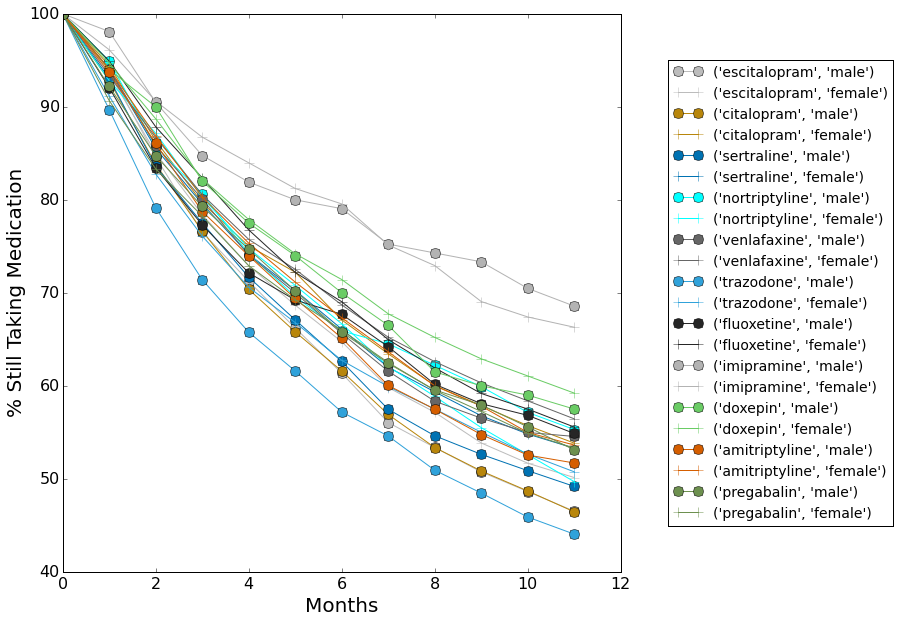

In [148]:
## Plot attrition rates for med_attrition2
import itertools
#marker = itertools.cycle((',', '+', '.', 'o', '*','+')) 
gender_marker = {'male': 'o', 'female': '+'}
plt.figure(figsize=(10,10))

print 'Female-to-Male ratios'
for mi, med in enumerate(med_attrition):
    if med_attrition[med]['female'][1] > 0 and med_attrition[med]['male'][1] > 0:
        #print med_attrition[med]
        tp = int(month_intervals/2)
        per_change = 0.001
        if (med_attrition[med]['female'][tp] - med_attrition[med]['male'][tp])/med_attrition[med]['female'][tp] > per_change:
            for gender in med_attrition[med]:
                marker = gender_marker[gender]
                data_to_plot = [med_attrition[med][gender][i]*100 for i in range(len(med_attrition[med][gender]))]
                plt.plot(data_to_plot, marker=marker, markersize=10, label=(med, gender), color=colors[mi])
            print med , round(med_attrition[med]['female'][tp] / med_attrition[med]['male'][tp],3)
            #print med, med_attrition[med]['male'][tp]
plt.xlabel("Months", size=20)
plt.xticks(size=16)
plt.ylabel("% Still Taking Medication", size=20)
plt.yticks(size=16)
plt.legend(loc=7, fontsize=14, bbox_to_anchor=[1.5, 0.5])

plt.show()

In [150]:
cache = {'#E24A33': (0.8862745098039215, 0.2901960784313726, 0.2), '#92C6FF': (0.5725490196078431, 0.7764705882352941, 1.0),
         '#0072B2': (0.0, 0.4470588235294118, 0.6980392156862745), 'magenta': (1.0, 0.0, 1.0), 'cyan': (0.0, 1.0, 1.0),
         '#001C7F': (0.0, 0.10980392156862745, 0.4980392156862745), '.15': (0.15, 0.15, 0.15), 'yellow': (1.0, 1.0, 0.0),
         '0.40': (0.4, 0.4, 0.4), '#30a2da': (0.18823529411764706, 0.6352941176470588, 0.8549019607843137), 
         '#4C72B0': (0.2980392156862745, 0.4470588235294118, 0.6901960784313725), 
         '#8EBA42': (0.5568627450980392, 0.7294117647058823, 0.25882352941176473), 
         '#6d904f': (0.42745098039215684, 0.5647058823529412, 0.30980392156862746), 
         '#bcbcbc': (0.7372549019607844, 0.7372549019607844, 0.7372549019607844), 
         '#7600A1': (0.4627450980392157, 0.0, 0.6313725490196078), 
         '#D55E00': (0.8352941176470589, 0.3686274509803922, 0.0), '#006374': (0.0, 0.38823529411764707, 0.4549019607843137), 
         '#B8860B': (0.7215686274509804, 0.5254901960784314, 0.043137254901960784),
         '#7A68A6': (0.47843137254901963, 0.40784313725490196, 0.6509803921568628), 
         '#03ED3A': (0.011764705882352941, 0.9294117647058824, 0.22745098039215686), 
         '0.70': (0.7, 0.7, 0.7), '0.50': (0.5, 0.5, 0.5),
         '#D65F5F': (0.8392156862745098, 0.37254901960784315, 0.37254901960784315), 
         '#6ACC65': (0.41568627450980394, 0.8, 0.396078431372549), '#cbcbcb': (0.796078431372549, 0.796078431372549, 0.796078431372549)}

In [143]:
colors = cache.values()

In [61]:
# Get unique part of patient ID

def unique(pid):
    uid = str(pid)[5:]
    return uid

def date_to_days(date):
    #print date
    year = int(date[:4])
    month = int(date[5:7])
    day = int(date[8:10])
    total_days = year*365 + month*30 + day
   
    return(total_days)